# Modelo sencillo mediante árboles de clasificación en Python


## Actividad 2


El objetivo principal de esta actividad es que el alumno aplique uno o varios algoritmos de clasificación para predecir la variable respuesta en el conjunto de datos objetivo, evaluar dicho algoritmo e interpretar los resultados
 
   - Autor: **Jaime César Orozco Lombart**
   - Asignatura:  **Aprendizaje Automático y Minería de Datos.(Grado en Informática)**
   - Profesor: **Oscar García García**
   - Fecha: **21/04/2021**
 

## Análisis descriptivo de los datos. 

In [6]:
# Cargamos todo lo necesario
import pandas as pd
import datetime
import ssl
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
import numpy as np

In [7]:
# Cargamos el dataset
# Este Dataset ha sido tratado externamente para que la clase de salida sea discreta. 
# No he conseguido hacerlo programáticamente en Python como me hubiera gustado
admissionDataset = pd.read_csv("https://raw.githubusercontent.com/Jolombart/AnalisisDatos/main/Admission_Predict-ClaseDiscreta.csv")


In [8]:
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm

#### Columnas que forman el dataset y su tipo de dato

In [10]:
admissionDataset.shape

(400, 9)

In [11]:
admissionDataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit       object
dtype: object

- El DataSet consta de 400 instancias 
- Hay 9 Atributos
- **Serial No.** es un simple índice y no nos interesa. 
- **Clase de salida: Chance of Admit** indica la probabilidad de ser admitido. Se ha transformado en 4 tramos discretos que representan una probabilidad muy baja, baja, media, alta o muy alta.
- No hay datos categóricos que tratar. Son todos numéricos

#### No hay nulos 

In [12]:
admissionDataset.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

#### Primeras 5 filas

In [13]:
admissionDataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,Muy Alta
1,2,324,107,4,4.0,4.5,8.87,1,Alta
2,3,316,104,3,3.0,3.5,8.00,1,Alta
3,4,322,110,3,3.5,2.5,8.67,1,Alta
4,5,314,103,2,2.0,3.0,8.21,0,Media


Eliminamos la columna fecha porquees redundante con última actualización

### Análisis previos

Como la clase de salida **Chance of Admit** es una variable continua, para realizar una clasificación se debe transformar en discreta.

Discretización: 

In [14]:
#admissionDataset_DIS= KBinsDiscretizer(n_bins=10, encode='ordinal', strategy = "kmeans").fit_transform(admissionDataset[['Chance of Admit']])
# No me ha salido discretizar con python.

**Se elimina el índice, Serial No. porque no es un atributo relevante**

In [15]:
admissionDataset.drop(columns=['Serial No.'])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,Muy Alta
1,324,107,4,4.0,4.5,8.87,1,Alta
2,316,104,3,3.0,3.5,8.00,1,Alta
3,322,110,3,3.5,2.5,8.67,1,Alta
4,314,103,2,2.0,3.0,8.21,0,Media
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,Alta
396,325,107,3,3.0,3.5,9.11,1,Alta
397,330,116,4,5.0,4.5,9.45,1,Muy Alta
398,312,103,3,3.5,4.0,8.78,0,Media


### Determinar el conjunto de modelización y el de validación

Se usará un 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer los tests de predicción. 

### Dividir los datos entre conjunto de modelación y conjunto de test

In [16]:
array = admissionDataset.values
x = array[:,1:8]
y = array[:,8]
#Se divide en modelo de entrenamiento y test (80/20 %)
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)

### Aplicar uno o varios algoritmos para predecir la variable respuesta. 

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [18]:
print(model.predict([[337,118,4,4.5,4.5,9.65,1]]))
print(model.predict([[324,107,4,4,4.5,8.87,1]]))
print(model.predict([[319,106,3,4,3,8,1]]))
print(model.predict([[334,119,5,5,4.5,9.7,1]]))


['Muy Alta']
['Alta']
['Alta']
['Muy Alta']


#### Análisis del modelo obtenido

Se evaluan las predicciones, en primer lugar la precisión obtenida:

In [19]:
print(accuracy_score(Y_validation, predictions))

0.5875


Matriz de confusión

In [20]:
print(confusion_matrix(Y_validation, predictions)) 

[[21  0  8  1  0]
 [ 1  3  6  0  1]
 [ 9  0 11  0  0]
 [ 5  0  0 12  0]
 [ 0  0  2  0  0]]


In [21]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

        Alta       0.58      0.70      0.64        30
        Baja       1.00      0.27      0.43        11
       Media       0.41      0.55      0.47        20
    Muy Alta       0.92      0.71      0.80        17
    Muy Baja       0.00      0.00      0.00         2

    accuracy                           0.59        80
   macro avg       0.58      0.45      0.47        80
weighted avg       0.65      0.59      0.58        80



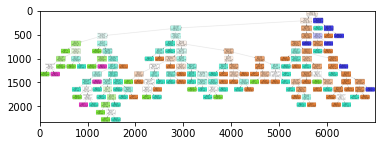

In [22]:
data = tree.export_graphviz(model, out_file=None, feature_names=admissionDataset.columns.values[1:8], class_names=["Muy Baja", "Baja", "Media", "Alta", "Muy Alta"], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('admissionDataset.png')

img = pltimg.imread('admissionDataset.png')
imgplot = plt.imshow(img)
plt.show()

## Comentario

 * No es un modelo aceptable, acierta poco mas que lanzar una moneda al aire. 
 * He comprobado que dependiendo del random de las instancias del entrenamiento cambia la precisión del modelo, por tanto, sería bueno cambiar la estrategia de entrenamiento a cross validation

#### Análisis de la validación cruzada

In [33]:
array = admissionDataset.values
x = array[:,1:8]
y = array[:,8]
kf = KFold(n_splits=5)

In [34]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv=kf, scoring="accuracy")
print(f'Precision de cada set : {score}')
print(f'Precision media: {"{:.2f}".format(score.mean())}')

Precision de cada set : [0.5875 0.6375 0.55   0.6    0.6875]
Precision media: 0.61


In [35]:
print("%0.2f de precisión con desviación estándar de %0.2f" % (score.mean(), score.std()))

0.61 de precisión con desviación estándar de 0.05


**Comentario:** Un modelo con una precisión del 61% es algo mejor, pero no lo suficiente. Ahora me inclinaría por modificar el algoritmo.

<br><br>Gracias por leer mi trabajo<br>
**Jaime César Orozco  Lombart**

<br><br>
**Bibliografía y Referencias**

- Temas 1 a 4: Documentación de la asignatura Aprendizaje Automático y Minería de Datos.(Grado en Informática).  ©Universidad Internacional de la Rioja. Obtenido de UNIR: https://campusvirtual.unir.net/
- Web: https://scikit-learn.org/stable/
- Web: https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869
